### 4.6 逻辑回归

逻辑回归-Logistic回归(也称为Logit回归)被广泛用于估算一个实例属于某个特定类别的概率。

#### 4.6.1 估计概率

与线性回归一样，逻辑回归模型也是计算输入特征的加权和（加上偏置项），但是不同于线性回归模型直接输出结果，它输出的是结果的数理逻辑值（公式4-13）

逻辑回归模型的估计概率(向量化形式):

$$
\hat{p} = h_{\theta}(x) = \sigma(x^T \theta) \tag{4-13}
$$

逻辑记为$\sigma(\cdot)$, 是一个sigmoid函数，输出一个介于0和1之间的数字

$$
\sigma(t) = \frac{1}{1 + e^{-t}}        \tag{4-14}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


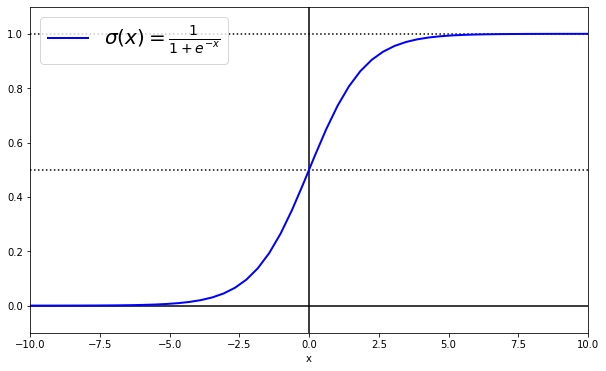

In [2]:
X = np.linspace(-10, 10, 50)
y = 1/(1 + np.exp(-X))
plt.figure(figsize=(10, 6))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(X, y, 'b-', linewidth=2, label=r"$\sigma(x)=\frac{1}{1+e^{-x}}$")
plt.xlabel('x')
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

一旦逻辑回归模型估算出实例x属于正类的概率:

$$
\hat{p} = h_{\theta}(x)
$$

就可以轻松是做出预测 $\hat{y}$ :

$$
\hat{y} = \begin{cases}
    0, \text{if } \hat{p} \lt 0.5  \\
    1, \text{if } \hat{p} \ge 0.5
\end{cases} \tag{4-15}
$$

#### 4.6.2 训练和成本函数

逻辑回归成本函数(对数损失):

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)} \log(\hat{p}^{(i)}) + (1-y^{(i)}) \log(1-\hat{p}^{(i)})]       \tag{4-17}
$$

但是坏消息是，这个函数没有已知的闭式方程来计算最小优化成本函数 $\theta$，而好消息是这是个凸函数，所以通过梯度下降（或是其他任意优化算法）保证能找出全局最小值（只要学习率不是太大，你又能长时间等待）

#### 4.6.3 决策边界

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)
len(X), len(y)

(150, 150)

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

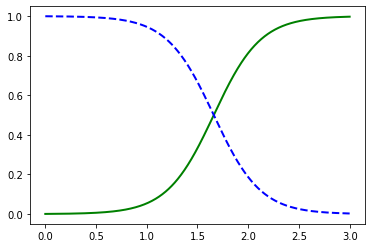

In [7]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.show()

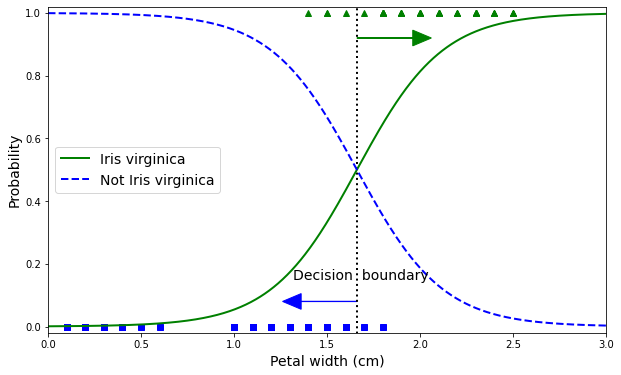

In [26]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 6))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [27]:
decision_boundary

array([1.66066066])

In [28]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

还是同样的数据集，不过这次采用了两个特征：花瓣宽度和花瓣长度

In [29]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
X = iris['data'][:, 2:]
y = (iris['target']==2).astype(np.int)
X[0], y[0]

(array([1.4, 0.2]), 0)

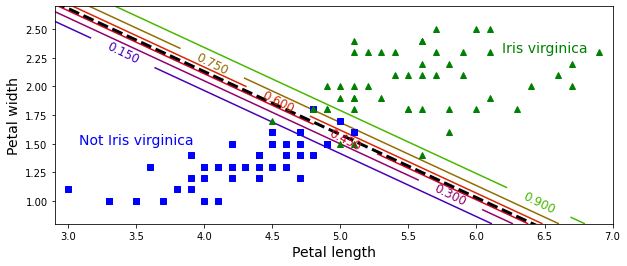

In [40]:
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

控制Scikit-Learn `LogisticRegression`模型的正则化强度的参数不是alpha，而是反值C，C值越大，对模型的正则化越少

#### 4.6.4 Softmax回归
逻辑回归模型经过推广，可以直接支持多个类别，而不需要训练并组合多个二元分类器，这就是Softmax回归，也叫做多元逻辑回归。

原理很简单：给定一个实例x, Softmax回归模型首先计算每个类k的分数$s_k(x)$，然后对这些分数应用softmax函数，估算出每个类的概率。

$$
S_k(x) = x^T \theta^{(k)}       \tag{4-19}
$$

Softmax函数:

$$
\hat{p_k} = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^K \exp(s_j(x))}         \tag{4-20}
$$

- K是类数
- s(x)是一个向量，其中包含实例x的每个类的分数
- $\sigma(s(k))_k$是实例x属于k的估计概率，给定该实例每个类的分数

Softmax回归分类预测

$$
\hat{y} = \underset{k}{\arg \max } \sigma(s(x))_k = \underset{k}{\arg \max } s_k(x) = \underset{k}{\arg \max }((\theta^{(k)})^T x)     \tag{4-21}
$$

argmax运算符返回使函数最大化的变量值。在此等式中，它返回使估计概率$\sigma(s(x))_k$最大化的k值。

Softmax回归分类器一次只能预测一个类（即它是多类，而不是多输出），因此它只能与互斥类（例如不同类型的植物）一起使用。**你无法使用它在一张照片中识别多个人**

既然你已经知道了模型如何进行概率估算并作出预测，那么我们再来看看怎么训练。训练目标是得到一个能对目标类做出高概率估算的模型（也就是其他类的概率相应要低）。通过公式4-22的成本函数（也叫做交叉熵）最小化来实现这个目标。因为当模型对目标做出较低概率的估算时会收到惩罚，**交叉熵经常被用于衡量一组估算出的类概率跟目标类的匹配程度**。np

$$
J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log (\hat{p}_k^{(i)})        \tag{4-22}
$$

- $y_k^{(i)}$是属于类k的第i个实例的目标概率，一般而言等于1或0， 具体取决于实例是否属于该类

当只有两个类（K=2）时，此成本等效于逻辑回归的成本函数（4-17）

当用两个以上的类训练时，Scikit-Learn的`LogisticRegression`默认选择使用的是一对多的训练方式，不过将超参数`multi_class`设置为"multinomial"，可以将其切换成Softmax回归。你还必须指定一个支持Softmax回归的求解器，比如“lbfgs”求解器。默认使用$l_2$正则化，你可以通过超参数C进行控制

In [41]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

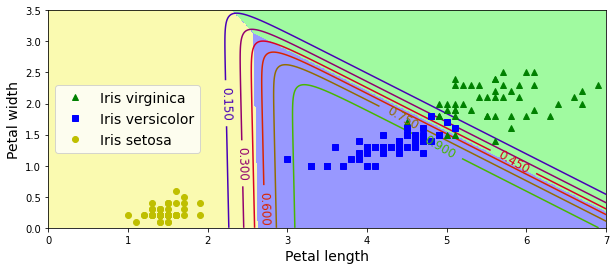

In [42]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()